<a href="https://colab.research.google.com/github/jan-kreischer/UZH_Network-Science_Final-Project/blob/main/index_adrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import networkx as nx

In [12]:
def read_haslemere_graph():
  # First we read the CSV: Contact tracing data over 3 days
  tracing_df = pd.read_csv("https://raw.githubusercontent.com/skissler/haslemere/master/Kissler_DataS1.csv")
  tracing_graph = nx.Graph()
  # Then we add for every contact <= 5m an edge with the attribute distance that shows the exact distance
  for index, row in tracing_df.iterrows():
      if row[3] <= 5 and not tracing_graph.has_edge(row[1], row[2]):
        tracing_graph.add_edge(row[1], row[2], distance=row[3], timestep=row[0])
  return tracing_graph

2485 450


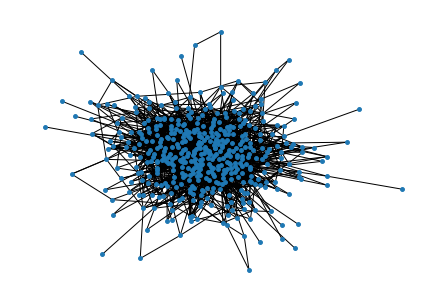

In [14]:
graph = read_haslemere_graph()
print(len(graph.edges), len(graph.nodes))
nx.draw(graph, node_size=15, pos=nx.spring_layout(graph))

In [15]:
nodes = list(graph.nodes())
edges = list(graph.edges(data=True))
print(nodes[0])
print(edges[0:10])

2
[(2, 215, {'distance': 9, 'timestep': 1}), (2, 21, {'distance': 3, 'timestep': 2}), (2, 246, {'distance': 8, 'timestep': 142}), (2, 138, {'distance': 0, 'timestep': 185}), (2, 404, {'distance': 0, 'timestep': 354}), (2, 311, {'distance': 0, 'timestep': 361}), (2, 387, {'distance': 0, 'timestep': 387}), (2, 128, {'distance': 0, 'timestep': 394}), (215, 375, {'distance': 0, 'timestep': 3}), (215, 265, {'distance': 9, 'timestep': 17})]


In [16]:
print(nx.average_shortest_path_length(graph))

2.9426973521405593
